In [194]:
import pandas
import datetime as dt
import japanize_matplotlib

In [195]:
#本来はExcelデータを入力するようにする.
corona=pandas.read_csv('corona.csv')
corona=corona[['番号','年代','性別','居住地','発症日','判明日','その他（＊）']]
corona=corona[corona['番号']!='※居住地にかかわらず、感染症の予防及び感染症の患者に対する医療に関する法律に基づき、栃木県及び宇都宮市に届け出のあった患者について掲載しています。（他県や検疫所に届け出があった患者は、他県等で公表されます。）\n※患者・御家族の人権尊重・個人情報保護に御理解と御配慮をお願いします。\n※退院日等の「退院」には、感染症法上の入院勧告等の解除及び県外保健所への入院等の対応依頼を含みます。\n(＊) 陽性者との接触の有無、感染に関与すると考えられる行動歴等  ']

<h1>全体データ</h1>

In [196]:
corona=corona.dropna(how='all')
corona = corona.dropna(axis=0, subset=['番号'])
corona[corona['番号'].isnull()]
corona=corona[corona['番号']!=' ']
corona=corona.reset_index()
corona['番号']=corona['番号'].astype(int)
#1483より前は昨年
#一旦調査中のデータを抜く
corona['day']=''
corona=corona[corona['判明日']!='調査中']
corona=corona[corona['判明日']!='現在調査中']
corna=corona.reset_index()
corona['判明日']=pandas.to_datetime(corona['判明日'], format='%m月%d日')
corona['day']=corona['判明日'].dt.strftime('%m-%d')
corona=corona.reset_index()

In [197]:
'''
当面の最終的な目標は, 2020年のデータと2021年のデータの区別ができるようにすることが目標
'''
corona['Year']=0
fr=corona[corona['番号']<1483].index.values[0]
la=corona[corona['番号']<1483].index.values[len(corona[corona['番号']<1483].index.values)-1]
fr1=corona[corona['番号']==1516].index.values[0]
la1=corona[corona['番号']==1498].index.values[0]
corona['Year'][fr:la]=2020
corona['Year'][fr1:la1]=2020
for i in range(len(corona)):
    if corona['Year'][i]==0:
        corona['Year'][i]=2021
corona

<ipython-input-197-733705b3d232>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona['Year'][fr:la]=2020
<ipython-input-197-733705b3d232>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona['Year'][fr1:la1]=2020
<ipython-input-197-733705b3d232>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona['Year'][i]=2021


,level_0,index,番号,年代,性別,居住地,発症日,判明日,その他（＊）,day,Year
0,0,0,10781,30代,女性,宇都宮市,調査中,1900-08-18,※宇都宮市4002例目,08-18,2021
1,1,1,10780,10代,女性,宇都宮市,調査中,1900-08-18,※宇都宮市4001例目,08-18,2021
2,2,2,10779,10代,女性,宇都宮市,調査中,1900-08-18,10783･10784例目の家族\n※宇都宮市4000例目,08-18,2021
3,3,3,10778,10代,女性,宇都宮市,調査中,1900-08-18,10783･10785例目の家族\n※宇都宮市3999例目,08-18,2021
4,4,4,10777,40代,男性,宇都宮市,調査中,1900-08-18,10784･10785例目の家族\n※宇都宮市3998例目,08-18,2021
...,...,...,...,...,...,...,...,...,...,...,...
10768,10777,10784,5,40代,男性,フィリピン,NaN,1900-03-24,フィリピンから帰国,03-24,2020
10769,10778,10785,4,50代,男性,県南,NaN,1900-03-20,ポルトガル旅行,03-20,2020
10770,10779,10786,3,40代,女性,宇都宮,NaN,1900-03-18,タイ旅行 \n※宇都宮市1例目,03-18,2020
10771,10780,10787,2,30代,女性,県南,NaN,1900-03-05,大阪ライブハウス、ショッピングセンター勤務,03-05,2020


<h2>月別コロナ数推移</h2>
<pre>
現状, 発症日をベースにすると調査中のデータが多い為判明日をベースにカウントする.
※発症数をcountで取る.
</pre>

<AxesSubplot:xlabel='判明日'>

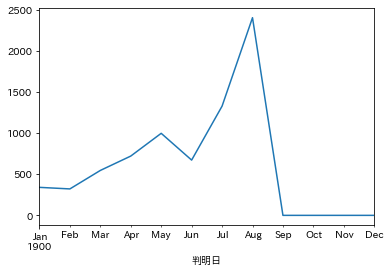

In [199]:
#2021年のデータを対象とする.
corona=corona[corona['Year']==2021]
corona.groupby(pandas.Grouper(key='判明日', freq='M')).count()['発症日'].plot()

In [200]:
corona.groupby(pandas.Grouper(key='判明日', freq='M')).count()['発症日']

判明日
1900-01-31     341
1900-02-28     322
1900-03-31     547
1900-04-30     722
1900-05-31     999
1900-06-30     673
1900-07-31    1330
1900-08-31    2407
1900-09-30       0
1900-10-31       0
1900-11-30       0
1900-12-31       0
Freq: M, Name: 発症日, dtype: int64

<h2>居住地についての可視化</h2>
<pre>
多い順に10件に絞って可視化する.
</pre>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

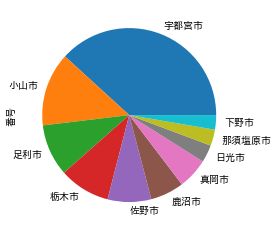

In [201]:
corona_place=corona.groupby('居住地').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_place.plot.pie(subplots=True)

In [202]:
corona_place

居住地
宇都宮市     3467
小山市      1241
足利市       873
栃木市       859
佐野市       735
鹿沼市       566
真岡市       518
日光市       295
那須塩原市     273
下野市       244
Name: 番号, dtype: int64

<h2>年齢についての可視化</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

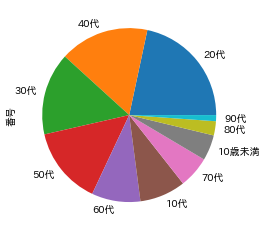

In [203]:
corona_nen=corona.groupby('年代').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_nen.plot.pie(subplots=True)

In [204]:
corona_nen

年代
20代      2328
40代      1785
30代      1648
50代      1553
60代       974
10代       919
70代       631
10歳未満     511
80代       283
90代       122
Name: 番号, dtype: int64

<h2>性別についての可視化</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

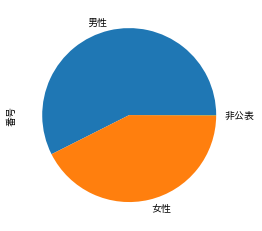

In [205]:
corona_sei=corona.groupby('性別').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_sei.plot.pie(subplots=True)

In [206]:
corona_sei

性別
男性     6187
女性     4580
非公表       6
Name: 番号, dtype: int64

<h2>日別コロナ数推移</h2>
<pre>
現状, 発症日をベースにすると調査中のデータが多い為判明日をベースにカウントする.
※発症数をcountで取る.
</pre>

<AxesSubplot:xlabel='判明日'>

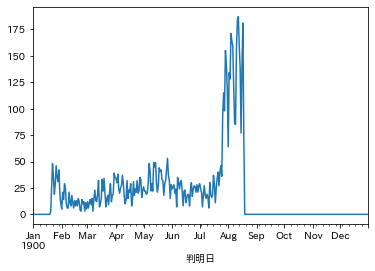

In [207]:
corona.groupby(pandas.Grouper(key='判明日', freq='D')).count()['発症日'].plot()

In [208]:
corona.groupby(pandas.Grouper(key='判明日', freq='D')).count()['発症日']

判明日
1900-01-01    0
1900-01-02    0
1900-01-03    0
1900-01-04    0
1900-01-05    0
             ..
1900-12-27    0
1900-12-28    0
1900-12-29    0
1900-12-30    0
1900-12-31    0
Freq: D, Name: 発症日, Length: 365, dtype: int64

<h1>今月のデータ</h1>

In [209]:
dt_now = dt.datetime.now()
if dt_now.month<10:
    corona_today=corona[corona['day'].str.startswith('0'+str(dt_now.month))]
else:
    corona_today=corona[corona['day'].str.startswith(str(dt_now.month))]
corona_today

,level_0,index,番号,年代,性別,居住地,発症日,判明日,その他（＊）,day,Year
0,0,0,10781,30代,女性,宇都宮市,調査中,1900-08-18,※宇都宮市4002例目,08-18,2021
1,1,1,10780,10代,女性,宇都宮市,調査中,1900-08-18,※宇都宮市4001例目,08-18,2021
2,2,2,10779,10代,女性,宇都宮市,調査中,1900-08-18,10783･10784例目の家族\n※宇都宮市4000例目,08-18,2021
3,3,3,10778,10代,女性,宇都宮市,調査中,1900-08-18,10783･10785例目の家族\n※宇都宮市3999例目,08-18,2021
4,4,4,10777,40代,男性,宇都宮市,調査中,1900-08-18,10784･10785例目の家族\n※宇都宮市3998例目,08-18,2021
...,...,...,...,...,...,...,...,...,...,...,...
10572,10581,10587,200,50代,男性,栃木市,NaN,1900-08-03,,08-03,2020
10573,10582,10588,199,50代,女性,宇都宮市,NaN,1900-08-02,※宇都宮市73例目,08-02,2020
10574,10583,10589,198,20代,女性,宇都宮市,NaN,1900-08-02,183例目の同僚 \n※宇都宮市72例目,08-02,2020
10575,10584,10590,197,40代,女性,宇都宮市,NaN,1900-08-02,※宇都宮市71例目,08-02,2020


<h2>日別データ(今月)</h2>

<AxesSubplot:xlabel='判明日'>

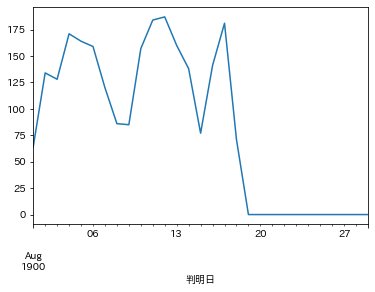

In [210]:
corona_today.groupby(pandas.Grouper(key='判明日', freq='D')).count()['発症日'].plot()

<h2>居住地についての可視化(今月)</h2>
<pre>
多い順に10件に絞って可視化する.
</pre>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

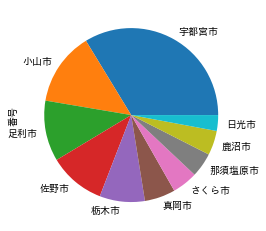

In [211]:
corona_place=corona_today.groupby('居住地').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_place.plot.pie(subplots=True)

In [212]:
corona_place

居住地
宇都宮市     690
小山市      279
足利市      231
佐野市      215
栃木市      172
真岡市      117
さくら市      97
那須塩原市     93
鹿沼市       93
日光市       60
Name: 番号, dtype: int64

<h2>年齢についての可視化(今月)</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

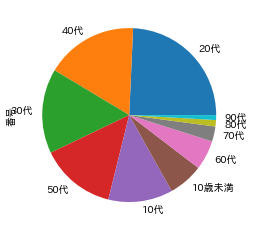

In [213]:
corona_nen=corona_today.groupby('年代').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_nen.plot.pie(subplots=True)

In [214]:
corona_nen

年代
20代      610
40代      430
30代      395
50代      352
10代      301
10歳未満    163
60代      138
70代       70
80代       30
90代       23
Name: 番号, dtype: int64

<h2>性別についての可視化(今月)</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

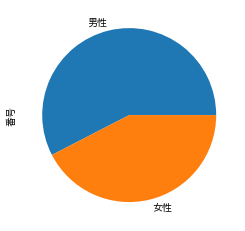

In [215]:
corona_sei=corona_today.groupby('性別').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_sei.plot.pie(subplots=True)